In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Introduction to Digital Forensics - Assignment 1

### Tor2Door Darknet Market data analysis



| Name | Student-Nr. |
|------|-------------|
|  Mai Lan Vu    | s1680234    |
|   Benjamin Othmer   | s2554267    |
|  Daniel Mocanu    | s2539748    |
|  Aleksander Petrov   | s2615576    |

### Categories

We will be analyzing the data samples that we collected.

This data was collected from the "tor2door" as located on the dark web.
We accessed the market by creating our own user accounts and the data was collected between the 21.10.22 and 25.10.22

The sales, as found in the data/Sales.csv file have the following columns:
Name, Market Category, Seller, Ranking (Legal/Illegal/Depends) and Reason (for the Ranking)
The data includes 102 Data points

The Vendors, as found in the data/Top_Vendors.csv file have the following columns:
Name, Count
We initially wanted to analyze the top 100 sellers on the website but noticed that there are only a total of 35 Sellers that have >0 sales.
The dataset contains 35 vendors.

In [177]:

data = pd.read_csv('data/Sales.csv', delimiter=';', skiprows=0, low_memory=False)
vendors = pd.read_csv('data/Top_Vendors.csv', delimiter=',', skiprows=0, low_memory=False)
#sales
print(list(data.columns))
print(data.shape)
#vendors
print(list(vendors.columns))
print(vendors.shape)


#Cleaning up the data
data['Ranking (Legal/Illegal/Depends)'] = data['Ranking (Legal/Illegal/Depends)'].str.lower()
data['Ranking (Legal/Illegal/Depends)'] = data['Ranking (Legal/Illegal/Depends)'].str.strip()
data['Seller'] = data['Seller'].str.lower()
data['Seller'] = data['Seller'].str.strip()
vendors['Name'] = vendors['Name'].str.lower()
vendors['Name'] = vendors['Name'].str.strip()


['Name', 'Market Category', 'Seller', 'Ranking (Legal/Illegal/Depends)', 'Reason']
(103, 5)
['Name', 'Count']
(35, 2)


### [Vendors] Top Vendor Sales distribution
First, we are going to look at the distribution of sales on the platform

As we can see the largest part of the market share belongs to a few vendors only.
This is in stark contrast to the amount of total items that were offered on the marketplace.

The first 3 vendors (heartkidnapper, DangerousTomato, HarleyQuinn) account for circa 60% of the market share.

,Name,Count,Marketshare
0,dangeroustomato,2243,27.230788
1,heartkidnapper,1626,19.740197
2,harleyquinn,791,9.603011
3,rvaska,485,5.888066
4,g3cko,387,4.698312
5,mrq1234,332,4.030594
6,enjoymyaccounts,237,2.877261
7,mysteryland,225,2.731577
8,drunkdragon,205,2.488770
9,digitalworld,201,2.440209


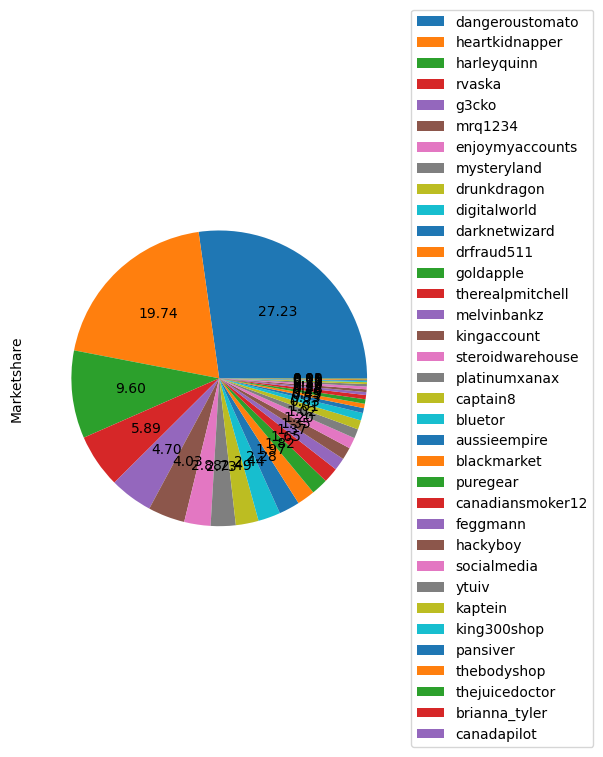

In [202]:

result = vendors['Count'].aggregate('sum')

#vendors = vendors[vendors['Marketshare'] > 1]

vendors['Marketshare'] = vendors['Count'] / result * 100
pie = vendors['Marketshare'].plot(kind='pie', x='Name', autopct='%.2f', labels=vendors.Name,  labeldistance=None)
pie.legend(loc='center left',  bbox_to_anchor=(1.0, 0.5))

vendors.head(15)

### [Sales] Count per Category

Below, the categories of data that we analyzed - as well as the count of data points


Services             34
Digital Products     20
Steroids             18
Drugs & Chemicals    15
Counterfeit Items     8
Data                  6
Fraud                 2
Name: Market Category, dtype: int64


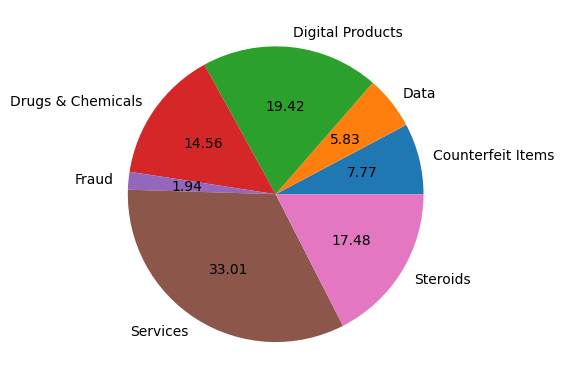

In [207]:
data.groupby('Market Category').size().plot(kind='pie', autopct='%.2f')

print(data['Market Category'].value_counts())


### Category Distribution

We have a high concentration of data points in the following categories: **Drugs & Chemicals, Steroids, Digital Products and Services**


Market Category
Counterfeit Items     8
Data                  6
Digital Products     20
Drugs & Chemicals    15
Fraud                 2
Services             34
Steroids             18
dtype: int64



<AxesSubplot: xlabel='Market Category'>

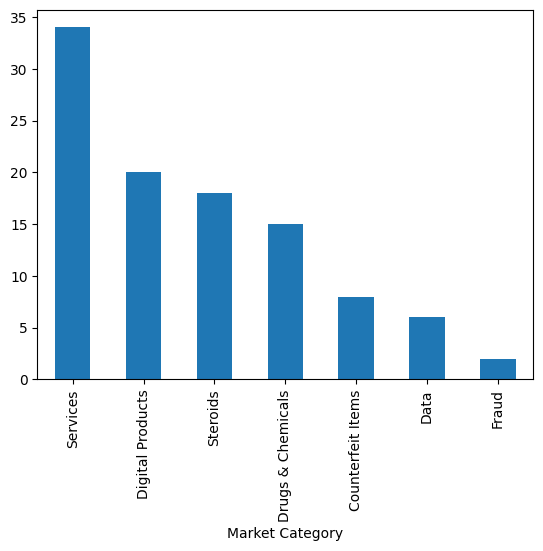

In [180]:
sr = data.groupby('Market Category').size()
print(sr)
sr.sort_values(ascending=False, inplace=True)
print()
sr.plot(kind='bar')

### [Sales] Distribution of sales per Vendor

Below is an overview of the amount of offers we have per seller that we collected in the data:

We have a total of 50 unique sellers in this dataset.


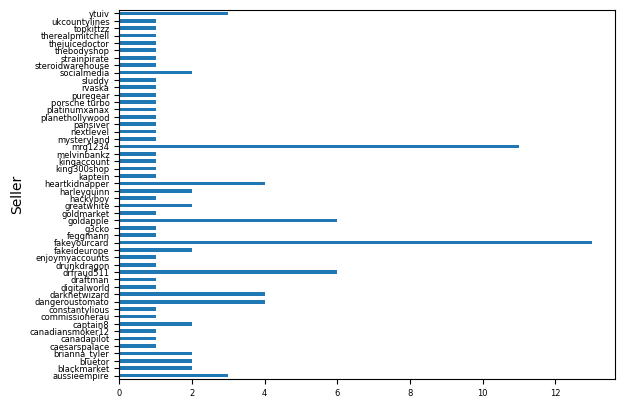

In [181]:
#Distinct Sellers

data.sort_values('Seller').groupby('Seller').size().plot(kind='barh', fontsize=6)

seller_count = len(data.groupby('Seller').size())

print(f"We have a total of {seller_count} unique sellers in this dataset.")


### Seller Overview - Market Category: Services

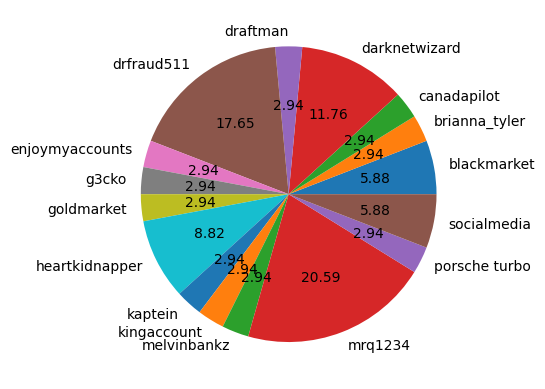

In [211]:
target = 'Services'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')


<AxesSubplot: >

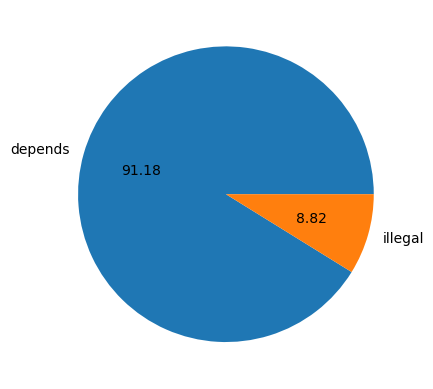

In [183]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Digital Products

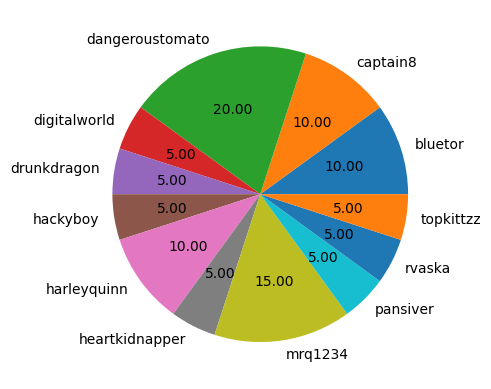

In [184]:
target = 'Digital Products'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

<AxesSubplot: >

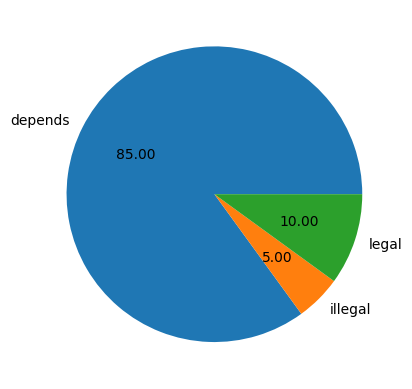

In [185]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Steroids

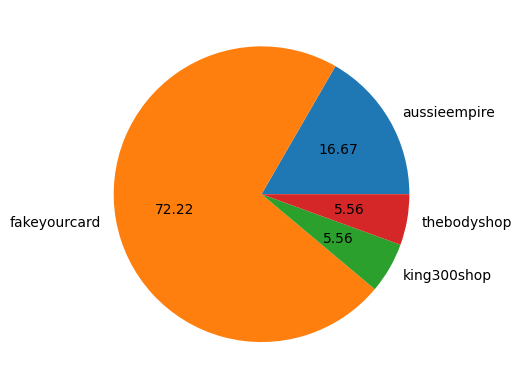

In [186]:
target = 'Steroids'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

<AxesSubplot: >

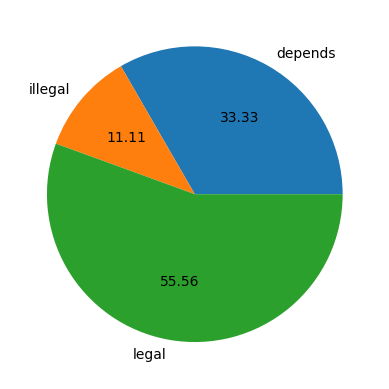

In [187]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Drugs and Chemicals

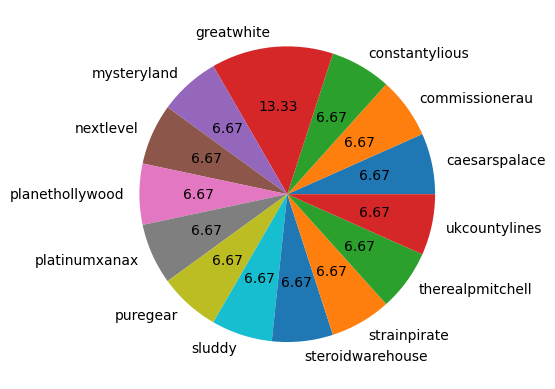

In [188]:
target = 'Drugs & Chemicals'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

<AxesSubplot: >

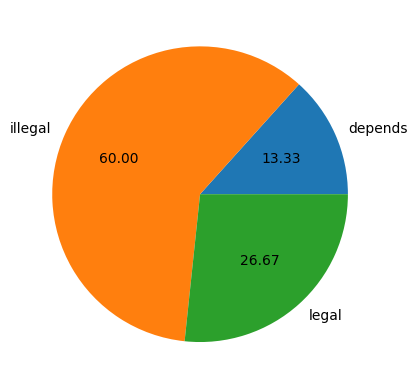

In [189]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Counterfeit Items

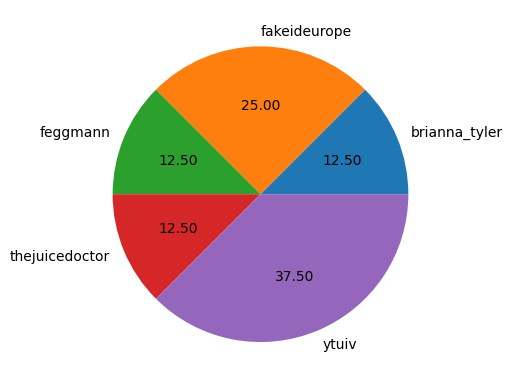

In [190]:
target = 'Counterfeit Items'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

<AxesSubplot: >

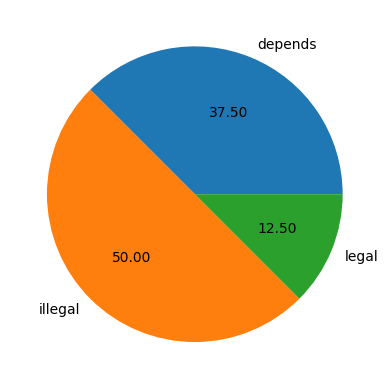

In [191]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Data

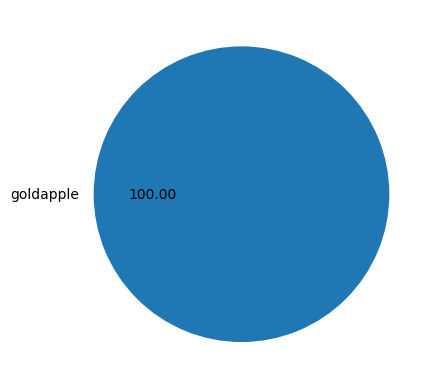

In [192]:
target = 'Data'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))


<AxesSubplot: >

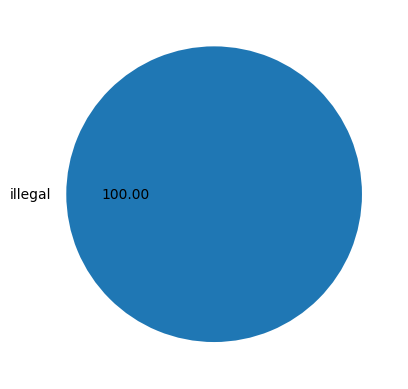

In [193]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')

### Seller Overview - Market Category: Fraud

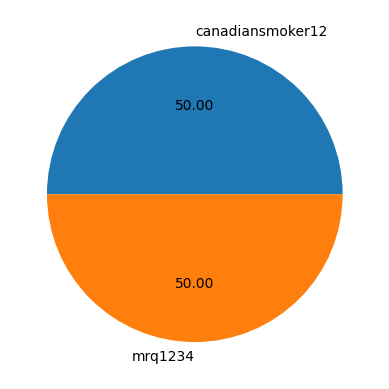

In [194]:
target = 'Fraud'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

<AxesSubplot: >

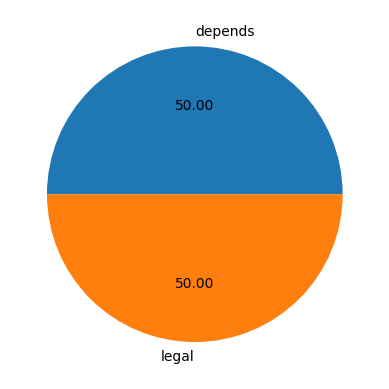

In [195]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f')